# Market Risk

## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
market_df = pd.read_csv('Market+Risk+Dataset.csv')

## Glimpse of Data

In [5]:
market_df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [6]:
market_df.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


## Fixing messy column names (containing spaces) for ease of use

In [7]:
market_df.columns = market_df.columns.str.replace(' ', '_').str.replace('&','and')

In [8]:
market_df.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [9]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   314 non-null    object
 1   Infosys                314 non-null    int64 
 2   Indian_Hotel           314 non-null    int64 
 3   Mahindra_and_Mahindra  314 non-null    int64 
 4   Axis_Bank              314 non-null    int64 
 5   SAIL                   314 non-null    int64 
 6   Shree_Cement           314 non-null    int64 
 7   Sun_Pharma             314 non-null    int64 
 8   Jindal_Steel           314 non-null    int64 
 9   Idea_Vodafone          314 non-null    int64 
 10  Jet_Airways            314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [4]:
market_df.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


### First, let us check the number of rows (observations) and the number of columns (variables)

In [10]:
print('The number of rows (observations) is',market_df.shape[0],'\n''The number of columns (variables) is',market_df.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


# 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

### Lets us plot & see price trend over time for different companies

### Changing format of 'Date' variable from object to Datetime

In [11]:
market_df['Date'] = [pd.to_datetime(d) for d in market_df['Date']]


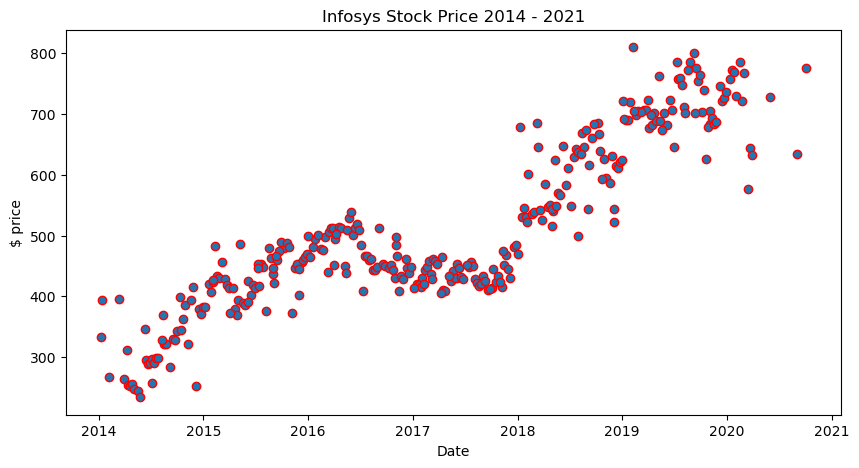

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(market_df['Date'], market_df['Infosys'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Infosys Stock Price 2014 - 2021")
plt.show()

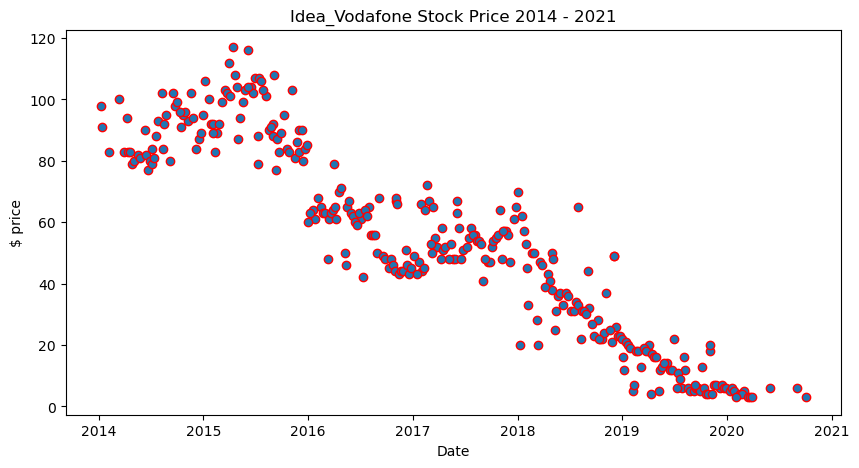

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(market_df['Date'], market_df['Idea_Vodafone'], edgecolors='r')
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Idea_Vodafone Stock Price 2014 - 2021")
plt.show()

# 2.2 Calculate Returns for all stocks with inference

Returns for the all stocks i.e difference of log of price at t and the log of price at t-1 are shown below.¶

In [14]:
stock_returns = np.log(market_df.drop(['Date','Date'],axis = 1)).diff(axis=0,periods=1)

In [15]:
stock_returns.shape

(314, 10)

In [16]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


# 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

### calculating stock means

In [17]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                  0.002794
Indian_Hotel             0.000266
Mahindra_and_Mahindra   -0.001506
Axis_Bank                0.001167
SAIL                    -0.003463
Shree_Cement             0.003681
Sun_Pharma              -0.001455
Jindal_Steel            -0.004123
Idea_Vodafone           -0.010608
Jet_Airways             -0.009548
dtype: float64

### calculating stock standard Deviation

In [18]:
stock_std = stock_returns.std(axis = 0).round(5)
stock_std

Infosys                  0.03507
Indian_Hotel             0.04713
Mahindra_and_Mahindra    0.04017
Axis_Bank                0.04583
SAIL                     0.06219
Shree_Cement             0.03992
Sun_Pharma               0.04503
Jindal_Steel             0.07511
Idea_Vodafone            0.10432
Jet_Airways              0.09797
dtype: float64

# 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

creating dataframe for its mean value as average and the standard deviation as its volatility

In [19]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_std})
df


,Average,Volatility
Infosys,0.002794,0.03507
Indian_Hotel,0.000266,0.04713
Mahindra_and_Mahindra,-0.001506,0.04017
Axis_Bank,0.001167,0.04583
SAIL,-0.003463,0.06219
Shree_Cement,0.003681,0.03992
Sun_Pharma,-0.001455,0.04503
Jindal_Steel,-0.004123,0.07511
Idea_Vodafone,-0.010608,0.10432
Jet_Airways,-0.009548,0.09797


### Let us plot & see what they say about stock prices

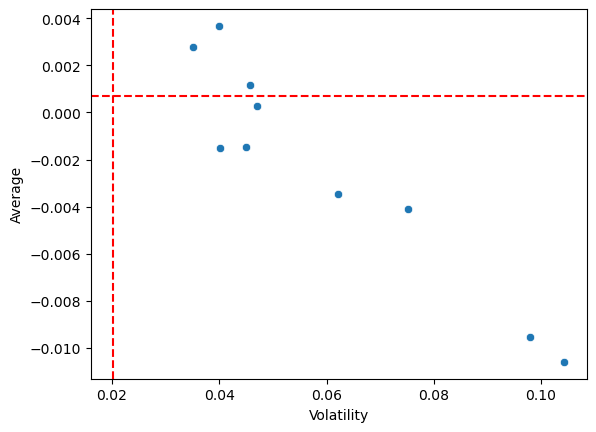

In [20]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

# END